<a href="https://colab.research.google.com/github/riyash0109/MachineLearning/blob/main/Po_decision_treee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#importing libraries

In [ ]:
df = pd.read_csv("/content/indian_airquality2.csv")
#importing dataset

In [ ]:
df.head()
#printing the head of the dataset

,id,country,state,city,station,pollutant_id,last_update,pollutant_min,pollutant_max,pollutant_avg
0,1,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",PM2.5,21-10-2021 01:00,69.0,109.0,86.0
1,2,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",PM10,21-10-2021 01:00,82.0,138.0,105.0
2,3,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",NO2,21-10-2021 01:00,10.0,42.0,19.0
3,4,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",NH3,21-10-2021 01:00,4.0,5.0,4.0
4,5,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",SO2,21-10-2021 01:00,16.0,42.0,27.0


In [ ]:
df["pollutant_avg"].mean()
#finding mean of the pollutant_avg column

54.10069044879172

In [ ]:
def categorise(row):  
    if row['pollutant_avg'] > 54:
        return 1
    else :
        return 0

df['lable'] = df.apply(lambda row: categorise(row), axis=1)
#making a new column names as lable which will be my class lable

In [ ]:
df.head()

,id,country,state,city,station,pollutant_id,last_update,pollutant_min,pollutant_max,pollutant_avg,lable
0,1,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",PM2.5,21-10-2021 01:00,69.0,109.0,86.0,1
1,2,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",PM10,21-10-2021 01:00,82.0,138.0,105.0,1
2,3,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",NO2,21-10-2021 01:00,10.0,42.0,19.0,0
3,4,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",NH3,21-10-2021 01:00,4.0,5.0,4.0,0
4,5,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",SO2,21-10-2021 01:00,16.0,42.0,27.0,0


In [ ]:
from sklearn.preprocessing import StandardScaler
#importing sklearn library
scaler = StandardScaler()
#calling the function standardscaler

In [ ]:
df2 = df.drop(['id','last_update','station','city','country','pollutant_min','pollutant_max','pollutant_avg'], axis=1)
#dropping the column which won't be used
df2

,state,pollutant_id,lable
0,Andhra_Pradesh,PM2.5,1
1,Andhra_Pradesh,PM10,1
2,Andhra_Pradesh,NO2,0
3,Andhra_Pradesh,NH3,0
4,Andhra_Pradesh,SO2,0
...,...,...,...
1831,West_Bengal,NO2,0
1832,West_Bengal,NH3,0
1833,West_Bengal,SO2,0
1834,West_Bengal,CO,0


In [ ]:
df2['state'].unique()

array(['Andhra_Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Delhi', 'Gujarat', 'Haryana', 'Jammu_&_Kashmir', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'TamilNadu', 'Telangana', 'Tripura',
       'Uttar_Pradesh', 'West_Bengal'], dtype=object)

In [ ]:
df2['pollutant_id'].unique()

array(['PM2.5', 'PM10', 'NO2', 'NH3', 'SO2', 'CO', 'OZONE'], dtype=object)

In [ ]:
df2['pollutant_id'].replace(['PM2.5', 'PM10', 'NO2', 'NH3', 'SO2', 'CO', 'OZONE'],
                        [0, 1,2,3,4,5,6], inplace=True)

In [ ]:
df2['state'].replace(['Andhra_Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Delhi', 'Gujarat', 'Haryana', 'Jammu_&_Kashmir', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'TamilNadu', 'Telangana', 'Tripura',
       'Uttar_Pradesh', 'West_Bengal'],
                        [0, 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25], inplace=True)

In [ ]:
X = df2.iloc[:, :2].values
y = df2.iloc[:, -1].values

In [ ]:
X

array([[ 0,  0],
       [ 0,  1],
       [ 0,  2],
       ...,
       [25,  4],
       [25,  5],
       [25,  6]])

In [ ]:
y

array([1, 1, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
predTree = drugTree.predict(X_testset)
predTree

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,

In [ ]:
print (predTree [0:10])
print (y_testset [0:10])

[0 0 0 1 1 1 0 1 0 0]
[0 1 0 1 1 0 0 0 0 0]


In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.8584392014519057


In [ ]:
from six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 


[[349  23]
 [ 48 131]]


              precision    recall  f1-score   support

           0       0.88      0.94      0.91       372
           1       0.85      0.73      0.79       179

    accuracy                           0.87       551
   macro avg       0.86      0.84      0.85       551
weighted avg       0.87      0.87      0.87       551



[Text(0.3812154696132597, 0.9545454545454546, 'X[1] <= 1.5\nentropy = 0.872\nsamples = 1285\nvalue = [909, 376]'),
 Text(0.1298342541436464, 0.8636363636363636, 'X[0] <= 7.5\nentropy = 0.721\nsamples = 366\nvalue = [73, 293]'),
 Text(0.049723756906077346, 0.7727272727272727, 'X[0] <= 5.5\nentropy = 0.382\nsamples = 121\nvalue = [9, 112]'),
 Text(0.027624309392265192, 0.6818181818181818, 'X[0] <= 0.5\nentropy = 0.514\nsamples = 61\nvalue = [7, 54]'),
 Text(0.016574585635359115, 0.5909090909090909, 'entropy = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.03867403314917127, 0.5909090909090909, 'X[0] <= 1.5\nentropy = 0.556\nsamples = 54\nvalue = [7, 47]'),
 Text(0.027624309392265192, 0.5, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.049723756906077346, 0.5, 'X[0] <= 2.5\nentropy = 0.51\nsamples = 53\nvalue = [6, 47]'),
 Text(0.022099447513812154, 0.4090909090909091, 'X[1] <= 0.5\nentropy = 0.722\nsamples = 10\nvalue = [2, 8]'),
 Text(0.011049723756906077, 0.3181818181818182, 'entr

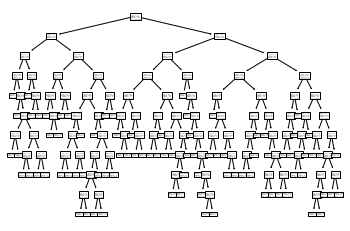

In [ ]:
from sklearn import tree

from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier(criterion = 'entropy')
dtree.fit(X_trainset,y_trainset)
predictions= dtree.predict(X_testset)
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_testset,predictions))
print('\n')
print(classification_report(y_testset,predictions))
tree.plot_tree(dtree)